## Final Project Submission

Please fill out:
* Student name: ANDREW WESTER
* Student pace: FULL TIME
* Scheduled project review date/time: FRIDAY, NOVEMBER 9, 2018
* Instructor name: RAFAEL CARRASCO


Write a Paragraph About OSEMiN Framework
# OSEMiN

**_OBTAIN_**
- For the obtain phase of the OSEMiN framework, I read in the 'kc_house_data.csv' data file as df, and examined the first 5 rows via df.head()
- After importing the data and examining the information, I started to look at possible pieces of the data that could be most beneficial in developing a possible hypothesis

**_SCRUB_**
- I started by recognizing the values that could be categorical, as well as values that had null information
- I recognized from seeing the heading, possible categorical values were bedrooms, bathrooms, floors, waterfront (boolean), view, condition, and grade.  While...
- Zipcode, latitude and longitude are all important for graphing on a map, but won't be likely needed to represent housing in this study
- For null values, I noticed from df.info() that waterfront, view, and yr_renovated each appeared to not have a full set of data that matched the number of rows each other column contained
- Upon further examination, I found that all three contained null values.
- As well as null values and categorical data, I noticed that the sqft_basement column was listed as an object, and upon re-examining the column, the datapoints are all numbers, and should be reflected as such by changing the dtype from object to float, so that operations could be performed on the column if necessary.

**_EXPLORE_**
- I started the explore step by graphing each of the columns to examine the relationships.  This confirmed my theory that bedrooms, bathrooms, floors, waterfront(boolean), view, condition, and grade could all be categorical values
- In thinking about it reasonably, bedrooms, bathrooms, floors, all were likely not a true categorical variable, since it was just that there wasn't much option for continuous data.  However, view, condition, and grade were all likely true categorical values, as view I found online represented the number of times the house had been viewed prior to purchase, condition was a representation of the quality of the house based on its age and grade.  Grade was rated on a scale of 1-13 and was based on building quality and materials, and the construction quality and materials among other things.  Finally, waterfront was also a categorical boolean value as the only values were 0 or 1, meaning it was a true/false column.

- As I continued through with the explore step, I gravitated towards two main points of emphasis: grade and total square feet.
    - For Grade, I recognized that there was a pattern behind the houses selling with a grade of above 8 and higher, as well as those with a grade of 7 or lower.  From this I began examining further the effects of the grade, and noticed that a similar effect on housing price that was created by the grade of the house was also created by total square footage of a house, but not with a strong enough correlation to have collinearity.
    - I decided for square feet of a house that it was difficult to establish whether having a basement would be a factor on housing price, and I did not want to throw out the data of sqft_basement, so I decided to combine the basement and living room square footage and create a new column called sqft_total measuring total square feet combined between the two.  This new column also appeared to have some significance in effecting the price of houses sold, so I chose to examine this as well.
- Before modeling my data, I wanted to confirm my theory, and split my data twice.  One split of data to create a new dataframe that was separated by total square feet of greater than 2,400 square feet, and another one that was houses with 2,400 or less square feet.  I graphed these data points relative to price, and also checked the effect that grade seemed to have on these houses.
- After splitting and confirming that square footage was effective, I repeated the process, but this time split by grade of 8 or higher and grade below 8.  I repeated my process from the split by total square feet, and again confirmed that I was on the right track with my data.

**_MODEL_**
- After looking at my two predictors of Total Square Feet, and Building Grade, I started modeling my data.  The building grade data was already normal, so I log normalized my total square feet data, and then scaled my square feet data by mean normalization, and split my building grade data into dummies for the grades.  I created my formula and modeled the data, which returned an R-square score of 0.565, and a confidence of 100% on every predictor except for Grade 3 and Grade 10, which cannot be removed from the data set as it is a dummy.  
- I then ran a train-test split and returned for my test data a Linear Regression Score:  0.5522988234858908.
- I also ran a train and test MSE and RMSE Test and returned the following:
    - Train Mean Squarred Error: 57653298281.62984
    - Test Mean Squarred Error: 63233832741.191124
    - Train RMSE:  240111.01241223785
    - Test RMSE:  251463.38250566646
- These results confirm the fit from the train to test data, and while the R-squared score isn't as high as we would otherwise prefer, this appears to be an accurate model comparing Building Grade with Total Square Feet to Housing Price.

**_INTERPRET_**
- All of the above data has been compiled into a presentation for stakeholders in this project.  The largest points of emphasis are as follows:
    - Building Grade and Total Square Feet are two of the most important factors affecting housing prices in King County Washington from 2013-2014.
    - We found that(as shown in graphs and calculations throughout and at the end of this notebook) houses with more than 2,400 total square feet(a round number chosen close to the average square footage) were sold for 1.84 times the price of houses with 2,400 or less square feet.
    - Similarly, homes receiving a grade of 8 or above were priced at 1.87 times that of houses with a grade below 8.
- These two factors appear to have the highest impact on housing prices, while also not being directly correlated with each other.  Eliminating this multicollinearity was important to show that the two factors did not affect each other and were both similarly affected housing prices, while remaining independent of each other.

- Recommendations for stakeholders are as follows:
    - If looking at renovations for a property, the most important parts will be to improve the building grade, which have to do with the quality of materials and the quality of construction.  Aiming for high end appliances and upgrades will be most helpful to improve building grade and the chance of increasing value of the house.
    
    - For those looking at purchasing a new property, if it is a renovation property, see the above recommendations.  However, if a purchase of a property is for long term value or investment, then houses with land to expand their house, or with room for improvements, the value of the house can be increased over time.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# Import and preview housing data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# Look at housing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# First Things I Notice:
- The column sqft_basement is listed as an object (string), and likely should be a numeric value.  Will be able to confirm from descriptive statistics
- It also seems that waterfront, view, and yr_renovated don't have the full dataset, which indicates there are likely null values in each column

In [3]:
# Check for null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- We confirm that there are three columns with null values, Waterfront, View, and Year Renovated

In [4]:
# Look at descriptive information of housing data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Observations:
- It appears that bedrooms, bathrooms, floors, waterfront (boolean), view, condition, grade, can all be considered categorical data
- Zipcode, latitude and longitude are all important for graphing on a map, but won't be likely needed to represent housing in this study

In [5]:
# Change sqft_basement '?' values to '0.0' in order to...
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')
# ... Change sqft_basement type from object to np.float64, check success via .info()
df['sqft_basement'] = df['sqft_basement'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [6]:
# Create column sqft_total to examine the combined square feet between basement and living room
df['sqft_total'] = df.sqft_basement + df.sqft_living

In [7]:
# Change yr_renovated null values to 0, check success via .unique()
df.yr_renovated.fillna(0., inplace=True)
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

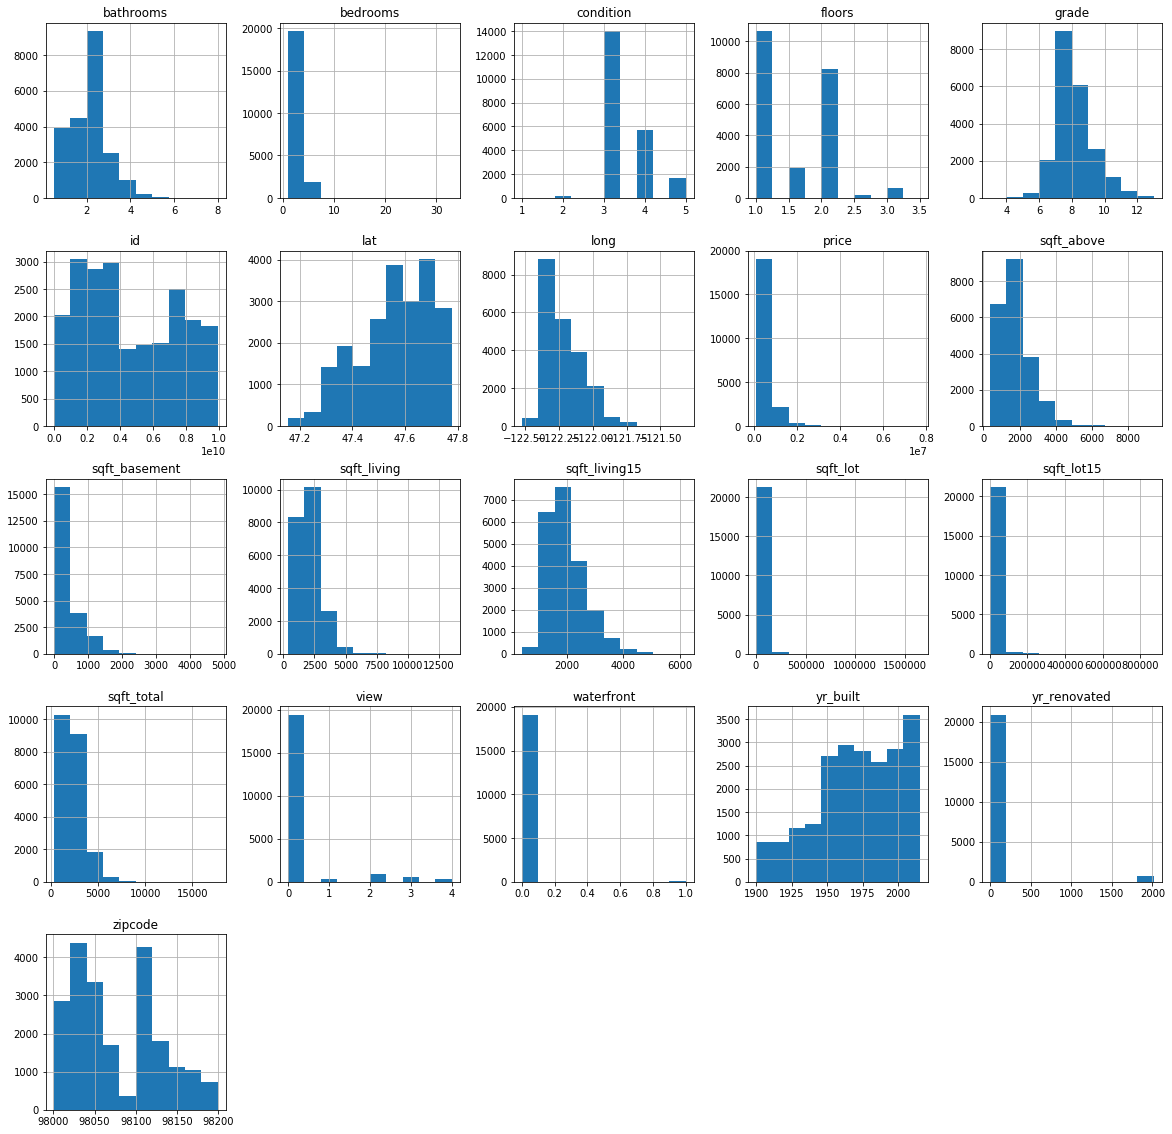

In [8]:
# Plot histogram of each column to see layout of each piece of data
df.hist(figsize =(20,20));

# Notes

- After removing null values and changing basement square feet column to a float, the DataFrame is graphed to look at the differences in each column and how each relates to number of houses sold.
- From plotting histograms for each column in our DataFrame, we can see and confirm that the columns we originally thought were categorical variables were indeed.  Condition, floors, view, and waterfront are all categorical variables, and waterfront appears to be a Boolean (True/False) category.
- We can see from our data that there is skewness in the following data: Bedrooms, Bathrooms, Latitude, Longitude, Price, Year Built, and each Square Foot Category

# Explore DATA

- First off, set the price column as it's own variable so we can use it later when modeling our data.
- We can check the descriptive statistics to learn more about pricing of houses

In [9]:
price = df.price
price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

# Examine Total Square Feet
- Plot a histogram to see the distribution of houses sold based on total square footage

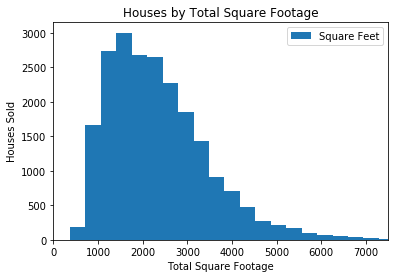

In [10]:
# Start examining total square feet per house, limit x values to 7500 for visual clarity 
x = df.sqft_total
plt.hist(x, bins=50, align='mid', label='Square Feet')
plt.xlim(0,7500)
plt.locator_params(axis='x', nbins=12)
plt.xlabel('Total Square Footage')
plt.ylabel('Houses Sold')
plt.legend()
plt.title('Houses by Total Square Footage');

- The histogram above gives us an idea of the dispersion amongst houses sold and what the majority of total square footage was for each house sold.  From the histogram, it appears the most houses sold had somewhere in the 1500-2500 square foot range.

- We can confirm this by looking at the descriptive statistics of the total square feet column in order to see the mean, median, max, and min values.

In [11]:
# Examine data for total square feet columm
df.sqft_total.describe()

count    21597.000000
mean      2366.038431
std       1175.817847
min        370.000000
25%       1500.000000
50%       2160.000000
75%       2980.000000
max      17670.000000
Name: sqft_total, dtype: float64

We confirm that the mean total square feet of houses sold is 2,366 feet, with one standard deviation in either direction bringing the value to:

-1 Deviation = 1,191 sqft,

+1 Deviation = 3,541 sqft

# Graph Total Square Feet
- We have plotted a histogram to see the number of houses sold, but now let's look at the relationship between the Total Square Feet of houses and the price they sell for to give us an idea of the relationship.

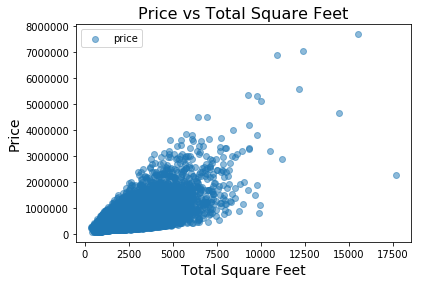

In [12]:
x = df.sqft_total
y = df.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price vs Total Square Feet', fontsize=16)
plt.legend()
plt.show()

# As we can see:
- There appears to be a consistent relationship between the total square feet of the houses sold, and the price that they sold for.  By Examining this further, we can get a better understanding of the housing market in King County, Washington.

# Split the Data by Square Feet
- Let's look at our theory that house sales have to do with total square feet, by first splitting our data into two halves along the approximate median square foot value, one with square feet more than 2,150, and another with square feet of 2,150 or less.

In [13]:
over_2150 = df.loc[df['sqft_total'] > 2150]
below_2150 = df.loc[df['sqft_total'] < 2151]

# Check length of each new dataframe to confirm not too large of a sample size in either category
print(len(over_2150))
print(len(below_2150))

10876
10721


# Graph:
- Now that we split the data, and we checked that the two samples sizes are close to the same size, we can start graphing to see the difference in square feet and price

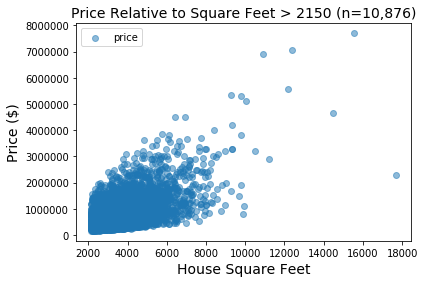

In [14]:
# Graph the distribution of housing square feet relative to price to see relationship
x = over_2150.sqft_total
y = over_2150.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('House Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Square Feet > 2150 (n=10,876)', fontsize=14)
plt.legend(loc=2);

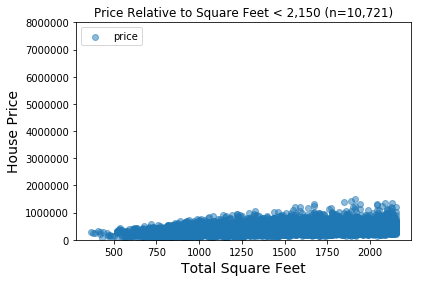

In [15]:
# Change scale of y axis to represent same scale as the prior graph
x = below_2150.sqft_total
y = below_2150.price
plt.scatter(x, y, alpha=0.5)
plt.ylim(0,8000000)
plt.title('Price Relative to Square Feet < 2,150 (n=10,721)')
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.legend(loc=2)
plt.show();

# Grade?
- Now that we have seen there is clearly a relationship between the price of the house sold and the total square feet, let's look to see if there is a similar relationship between the price of the house sold and the grade of the house.

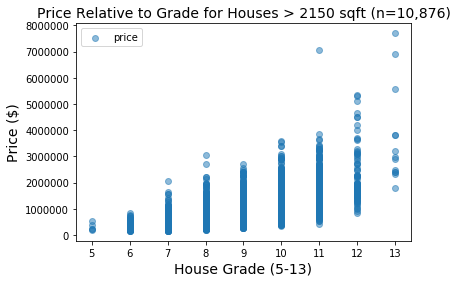

In [16]:
# Graph price vs grade for houses over 2150 sqft
x = over_2150.grade
y = over_2150.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('House Grade (5-13)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Grade for Houses > 2150 sqft (n=10,876)', fontsize=14)
plt.legend(loc=2);

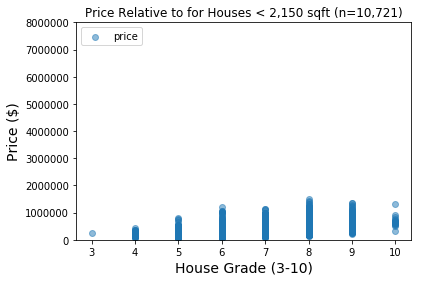

In [17]:
# Graph price vs grade for houses over 2150 sqft
# Change y axis scale to match prior graph
x = below_2150.grade
y = below_2150.price
plt.scatter(x, y, alpha=0.5)
plt.title('Price Relative to for Houses < 2,150 sqft (n=10,721)')
plt.xlabel('House Grade (3-10)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.ylim(0,8000000)
plt.legend(loc=2)
plt.show();

# Relationships:
- There definitely appears to be a relationship between Housing Grade and the price of the home, as well as a relationship between square footage and price of the home.  We will need to test for collinearity to make sure they don't overlap with each other.
- Next steps will be to drop the other columns from the data except for price, grade, and total square feet
- After dropping those columns, examine for correlation between grade and total square feet

In [18]:
# Create new df for analysis and drop all columns from new df except for price, grade, sqft_total
over_2150a = over_2150.drop(columns=['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                    'zipcode', 'lat', 'long', 'sqft_living15',
                                     'sqft_lot15', 'bedrooms', 'bathrooms'], axis=1)

In [19]:
# Create new df for analysis and drop all columns for new df except for price, grade, sqft_total
below_2150a = below_2150.drop(columns=['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                    'zipcode', 'lat', 'long', 'sqft_living15',
                                       'sqft_lot15', 'bedrooms', 'bathrooms'], axis=1)

               price     grade  sqft_total
price       1.000000  0.633872    0.618833
grade       0.633872  1.000000    0.498515
sqft_total  0.618833  0.498515    1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


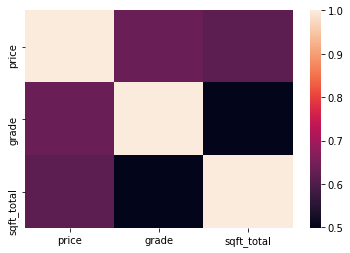

In [20]:
# Examine correlation via heatmap of price, grade, and total square feet for houses with more than 2400 sqft
print(over_2150a.corr());
print(sns.heatmap(over_2150a.corr()));

- In houses with square feet over 2,150, there is definitely some correlation between square feet and price, as well as grade and price, which we had already seen from graphing.  However, there does not appear to be any strength of relationship between grade and total square feet, meaning we can likely eliminate multicolinnearity and look at the two factors as both being relational with price.

               price     grade  sqft_total
price       1.000000  0.444814    0.338260
grade       0.444814  1.000000    0.508436
sqft_total  0.338260  0.508436    1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


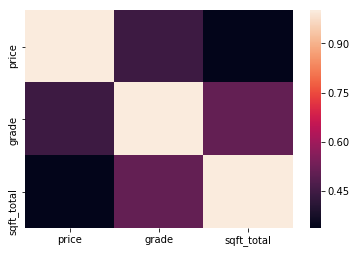

In [21]:
print(below_2150a.corr());
print(sns.heatmap(below_2150a.corr()));

- In houses with square feet less than 2,150, it appears that our results are similar to houses over 2,150 square feet, but not exactly the same. It would appear that we have less correlation with total square feet and price in this group of data, whereas grade and price appears to have some more correlation.  Relative to each other, total square feet and grade don't have an incredibly strong correlation, but a bit stronger than in houses over 2,150 square feet.

# Switch from Looking at Square Feet OVER or UNDER 2,400 TO:

- Start examining the grade of houses OVER or UNDER 8, and how that effects our data.

Text(0.5, 1.0, 'Houses Sold by Grade')

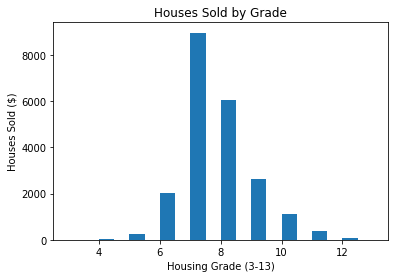

In [22]:
# Move on to examining grade per house, 
plt.hist(x=df.grade, bins=20, align='mid')
plt.xlabel('Housing Grade (3-13)')
plt.ylabel('Houses Sold ($)')
plt.title('Houses Sold by Grade')

In [23]:
df.grade.describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [24]:
# Split df by grade, less than 8 and greater than or equal to 8
eight_plus = df.loc[df["grade"]>7.5]
eight_minus = df.loc[df["grade"]<7.5]
print(len(eight_plus))
print(len(eight_minus))

10315
11282


In [25]:
eight_plus.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
count,1.031500e+04,1.031500e+04,10315.000000,10315.000000,10315.000000,1.031500e+04,10315.00000,9199.000000,10285.000000,10315.000000,...,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000
mean,4.671037e+09,7.149265e+05,3.637130,2.563694,2625.471352,1.827020e+04,1.75269,0.012067,0.380749,3.311779,...,2284.432477,333.825691,1983.990596,75.617838,98069.114881,47.572841,-122.188451,2387.621328,14886.086767,2959.297043
std,2.911293e+09,4.445661e+05,0.843526,0.648786,940.580394,4.751856e+04,0.53391,0.109189,0.962592,0.576621,...,865.792236,503.739800,25.997151,381.491656,49.579127,0.129775,0.141764,708.828072,31259.400188,1233.735540
min,1.200019e+06,1.400000e+05,1.000000,0.500000,750.000000,6.000000e+02,1.00000,0.000000,0.000000,1.000000,...,630.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,460.000000,651.000000,750.000000
25%,2.141331e+09,4.500000e+05,3.000000,2.250000,1990.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,...,1625.000000,0.000000,1972.000000,0.000000,98029.000000,47.509000,-122.309000,1880.000000,5165.500000,2110.000000
50%,4.014400e+09,6.095000e+05,4.000000,2.500000,2490.000000,8.075000e+03,2.00000,0.000000,0.000000,3.000000,...,2160.000000,0.000000,1990.000000,0.000000,98058.000000,47.592400,-122.190000,2310.000000,8006.000000,2730.000000
75%,7.518503e+09,8.250000e+05,4.000000,2.750000,3100.000000,1.290250e+04,2.00000,0.000000,0.000000,4.000000,...,2780.000000,650.000000,2004.000000,0.000000,98108.000000,47.670900,-122.086000,2810.000000,11837.000000,3530.000000
max,9.895000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.074218e+06,3.50000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.402000,6210.000000,871200.000000,17670.000000


In [26]:
eight_minus.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
count,1.128200e+04,1.128200e+04,11282.000000,11282.000000,11282.000000,1.128200e+04,11282.000000,10022.000000,11249.000000,11282.000000,...,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000
mean,4.497674e+09,3.806345e+05,3.131892,1.706346,1581.898068,1.220039e+04,1.257667,0.003492,0.099564,3.499468,...,1335.260149,241.730987,1959.122230,62.486527,98086.031377,47.548438,-122.237325,1619.989807,10812.858004,1823.629055
std,2.842378e+09,1.558398e+05,0.932799,0.629363,533.492105,3.465688e+04,0.424147,0.058995,0.487257,0.699544,...,442.747536,366.421968,27.177206,347.211078,55.659753,0.145145,0.135628,397.547183,22864.291026,799.390676
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,659.000000,370.000000
25%,2.113700e+09,2.650000e+05,3.000000,1.000000,1200.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,...,1030.000000,0.000000,1943.000000,0.000000,98034.000000,47.445900,-122.338000,1340.000000,5080.000000,1220.000000
50%,3.867400e+09,3.500000e+05,3.000000,1.750000,1520.000000,7.350000e+03,1.000000,0.000000,0.000000,3.000000,...,1250.000000,0.000000,1959.000000,0.000000,98103.000000,47.549550,-122.282000,1570.000000,7450.000000,1640.000000
75%,7.214820e+09,4.620000e+05,4.000000,2.250000,1900.000000,9.600000e+03,1.500000,0.000000,0.000000,4.000000,...,1550.000000,490.000000,1978.000000,0.000000,98125.000000,47.682600,-122.171000,1840.000000,9256.750000,2290.000000
max,9.900000e+09,2.050000e+06,33.000000,7.500000,4480.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,...,4190.000000,2070.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4090.000000,425581.000000,6210.000000


In [27]:
avg_price_above = np.mean(eight_plus['price'])
avg_price_above

714926.4740668929

In [28]:
avg_price_below = np.mean(eight_minus['price'])
avg_price_below

380634.50788867223

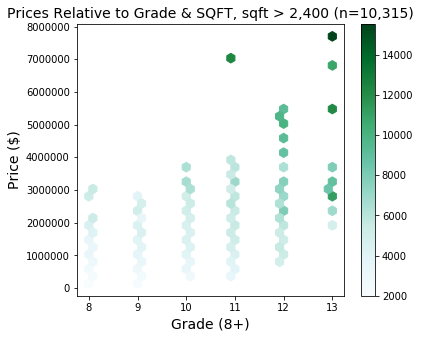

In [29]:
# Graph data with hexbin plot to examine the effect of grade on housing price
# By adding the color bar on the right to reference sqft_total, we can see the distribution of sqft_total on the house price as well
eight_plus.plot.hexbin(x='grade', y='price', C='sqft_total', gridsize=30, sharex=False, figsize=(6,5))
plt.xlabel('Grade (8+)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Prices Relative to Grade & SQFT, sqft > 2,400 (n=10,315)', fontsize=14);

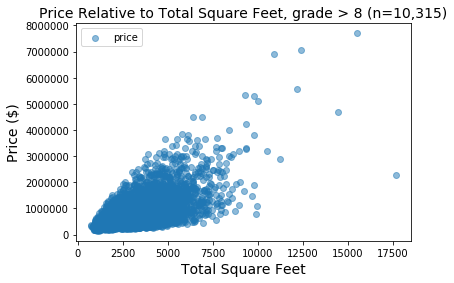

In [30]:
# Graph the distribution of square feet relative to price to see relationship
x = eight_plus.sqft_total
y = eight_plus.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Total Square Feet, grade > 8 (n=10,315)', fontsize=14)
plt.legend(loc=2);

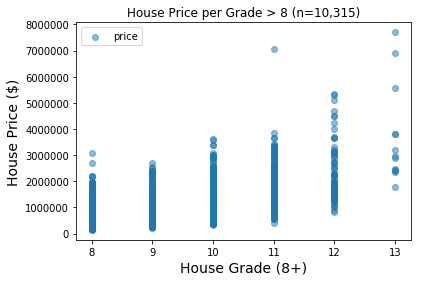

In [31]:
# Graph the distribution of grade>8 relative to price to see relationship
x = eight_plus.grade
y = eight_plus.price
plt.scatter(x, y, alpha=0.5)
plt.title('House Price per Grade > 8 (n=10,315)')
plt.xlabel('House Grade (8+)', fontsize=14)
plt.ylabel('House Price ($)', fontsize=14)
plt.legend(loc=2)
plt.show();

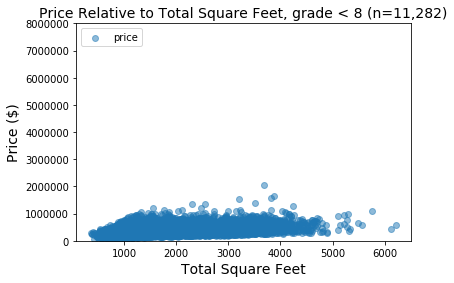

In [32]:
# Graph the distribution of square feet relative to price to see relationship
# Set y scale equal to that of grade >8 to show relative difference in price of houses
x = eight_minus.sqft_total
y = eight_minus.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Total Square Feet, grade < 8 (n=11,282)', fontsize=14)
plt.ylim(0, 8000000)
plt.legend(loc=2);

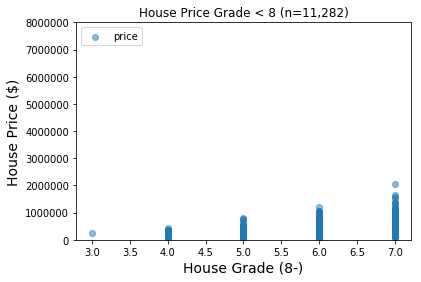

In [33]:
# Graph the distribution of grade<8 relative to price to see relationship
# Set y scale equal to that of grade >8 to show relative difference in price of houses
x = eight_minus.grade
y = eight_minus.price
plt.scatter(x, y, alpha=0.5)
plt.title('House Price Grade < 8 (n=11,282)')
plt.xlabel('House Grade (8-)', fontsize=14)
plt.ylabel('House Price ($)', fontsize=14)
plt.ylim(0,8000000)
plt.legend(loc=2)
plt.show();

# Time to Model Results with Full Dataset
Predictive Modeling on the Final Data (data_final) in order to examine the effects of total square feet and housing grade on price of a house.  This modeling allows us to look ahead and use our data to examine what effects these data points carry and how we can predict pricing of a house.

In [34]:
grade_dummies = pd.get_dummies(df['grade'], prefix="grade")
logsqft = np.log(df['sqft_total'])
price = df['price']
scaled_sqft = (logsqft-np.mean(logsqft))/(max(logsqft)-min(logsqft))
data_final = pd.DataFrame([])
data_final = pd.concat([price, scaled_sqft, grade_dummies], axis=1)
y = data_final[["price"]]
X = data_final.drop(["price"], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price         21597 non-null float64
sqft_total    21597 non-null float64
grade_3       21597 non-null uint8
grade_4       21597 non-null uint8
grade_5       21597 non-null uint8
grade_6       21597 non-null uint8
grade_7       21597 non-null uint8
grade_8       21597 non-null uint8
grade_9       21597 non-null uint8
grade_10      21597 non-null uint8
grade_11      21597 non-null uint8
grade_12      21597 non-null uint8
grade_13      21597 non-null uint8
dtypes: float64(2), uint8(11)
memory usage: 569.5 KB


In [35]:
print(len(data_final))
print(len(X))
print(len(y))

21597
21597
21597


In [36]:
print(data_final.head())
print(y.head())
print(X.head())

      price  sqft_total  grade_3  grade_4  grade_5  grade_6  grade_7  grade_8  \
0  221900.0   -0.150524        0        0        0        0        1        0   
1  538000.0    0.088229        0        0        0        0        1        0   
2  180000.0   -0.260939        0        0        0        1        0        0   
3  604000.0    0.079370        0        0        0        0        1        0   
4  510000.0   -0.059145        0        0        0        0        0        1   

   grade_9  grade_10  grade_11  grade_12  grade_13  
0        0         0         0         0         0  
1        0         0         0         0         0  
2        0         0         0         0         0  
3        0         0         0         0         0  
4        0         0         0         0         0  
      price
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0
   sqft_total  grade_3  grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  \
0   -0.150524        0        0        0   

In [37]:
f = "price ~ sqft_total+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13"
model = ols(formula=f, data=data_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     2549.
Date:                Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:24:03   Log-Likelihood:            -2.9840e+05
No. Observations:               21597   AIC:                         5.968e+05
Df Residuals:                   21585   BIC:                         5.969e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.319e+05   2.15e+04     43.334      0.000     8.9e+05    9.74e+05
sqft_total  8.403e+05   1.78e+04     47.285      0.000    8.06e+05    8.75e+05
grade_3    -3.653e+05   2.22e+05     -1.643      0.100   -8.01e+05    7.06e+04
grade_4    -4.659e+05    4.8e+04     -9.705      0.000    -5.6e+05   -3.72e+05
grade_5    -5.087e+05   2.61e+04    -19.523      0.000    -5.6e+05   -4.58e+05
grade_6    -5.089e+05   2.22e+04    -22.907      0.000   -5.52e+05   -4.65e+05
grade_7    -4.972e+05   2.16e+04    -22.971      0.000    -5.4e+05   -4.55e+05
grade_8    -4.121e+05   2.17e+04    -18.996      0.000   -4.55e+05    -3.7e+05
grade_9    -2.372e+05    2.2e+04    -10.786      0.000    -2.8e+05   -1.94e+05
grade_10    1.456e+04   2.26e+04      0.643      0.520   -2.98e+04    5.89e+04
grade_11    3.904e+05   2.45e+04     15.959      0.000    3.42e+05    4.38e+05
grade_12    1.044e+06   3.22e+04     32.461      0.000    9.81e+05    1.11e+06
grade_13    2.478e+06   6.53e+04     37.939      0.000    2.35e+06    2.61e+06
==============================================================================
Omnibus:                    15824.854   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           848272.377
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      33.115   Cond. No.                     1.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Our model summary provides us information on the accuracy of our data, which shows that we have an R-squared value of 0.565, which isn't a completely random group of data (close to 0), but also isn't entirely accurate (close to 1).
- We can also see that our p-value is withing our confidence value of 0.05 or 95% confidence, except for two variables in grade_3 and grade_10.

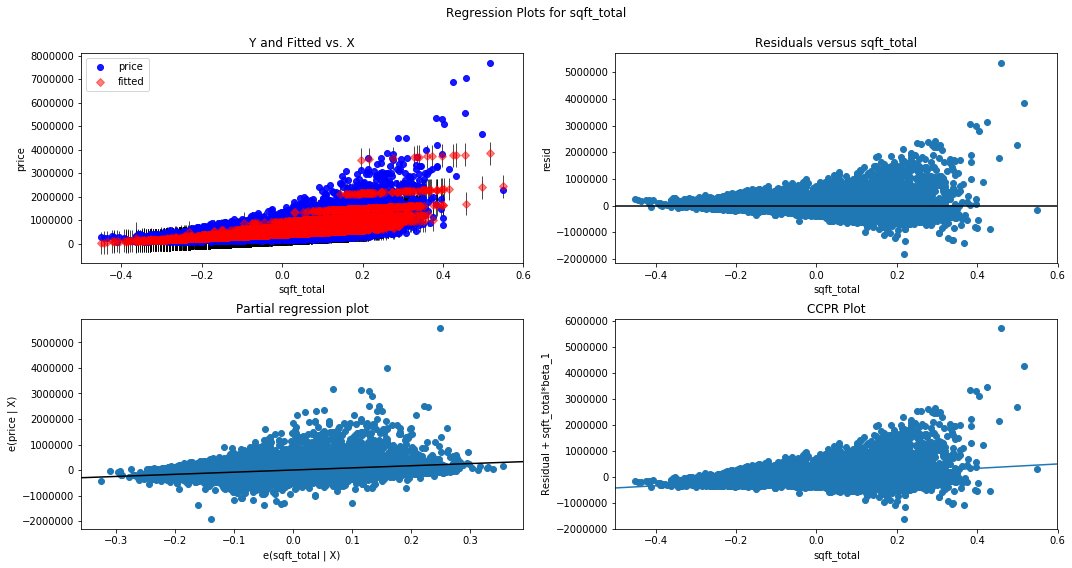

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_total", fig=fig)
plt.show()

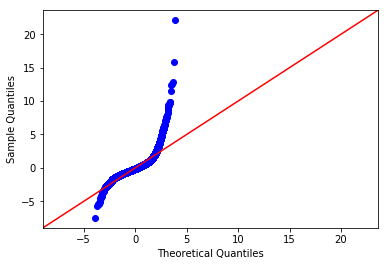

In [39]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [41]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

print('Linear Regression Score: ', linreg.score(X_test, y_test))

Linear Regression Score:  0.5626547947965994


In [42]:
# intercept
linreg.intercept_

array([999239.90762076])

In [43]:
# coefficients
linreg.coef_

array([[ 823024.59094411, -438911.55501806, -532048.09047499,
        -580887.36798089, -579406.92105845, -564833.51935283,
        -479067.01755805, -305524.48219386,  -56957.34374624,
         318676.09846107,  950229.64079202, 2268730.55813027]])

In [44]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    5.713183e+10
dtype: float64
Test Mean Squarred Error: price    6.509616e+10
dtype: float64


In [45]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 57131825711.417465
Test Mean Squarred Error: 65096156929.66408


In [46]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print('Train RMSE: ', train_rmse)
print('Test RMSE: ', test_rmse)

Train RMSE:  239022.64685886455
Test RMSE:  255139.4852422182


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-59236932003.801674
-59360479718.532
-59350462071.39418


# $Some Extra Graphs$

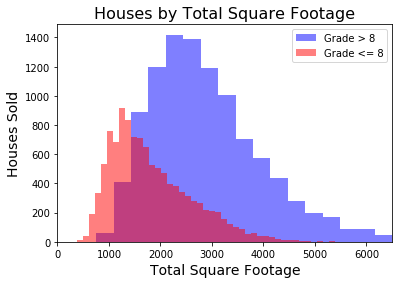

In [48]:
plus = eight_plus.sqft_total
minus = eight_minus.sqft_total
plt.hist(plus, alpha=0.5, bins=50, align='mid', label='Grade > 8', color='blue')
plt.hist(minus, alpha=0.5, bins=50, align='mid', label='Grade <= 8', color='red')
plt.xlim(0,6500)
plt.locator_params(axis='x', nbins=12)
plt.xlabel('Total Square Footage', fontsize=14)
plt.ylabel('Houses Sold', fontsize=14)
plt.legend()
plt.title('Houses by Total Square Footage', fontsize=16);

# Price vs. Square Feet (Discerned by Color for Grade)

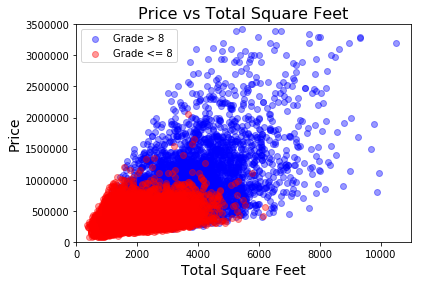

In [49]:
a = eight_plus.sqft_total
b = eight_plus.price
c = eight_minus.sqft_total
d = eight_minus.price
plt.scatter(a, b, alpha=0.4, c='blue', label='Grade > 8')
plt.scatter(c, d, alpha=0.4, c='red', label='Grade <= 8')
plt.xlabel('Total Square Feet', fontsize=14)
plt.xlim(0, 11000)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 3500000)
plt.title('Price vs Total Square Feet', fontsize=16)
plt.legend()
plt.show()

# Price vs. Square Feet > 2400 & Grade (Hexplot with Color Scale)

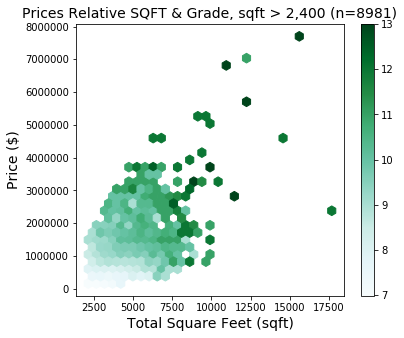

In [50]:
# Graph data with hexbin plot to examine the effect of total square feet on housing price
# By adding the color bar on the right to reference grade, we can see the distribution of grades on the house price as well
over_2150.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, sharex=False, figsize=(6,5))
plt.xlabel('Total Square Feet (sqft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Prices Relative SQFT & Grade, sqft > 2,400 (n=8981)', fontsize=14);

# Hexplot - $Price$ vs $Total SqFt$ & $Grade$

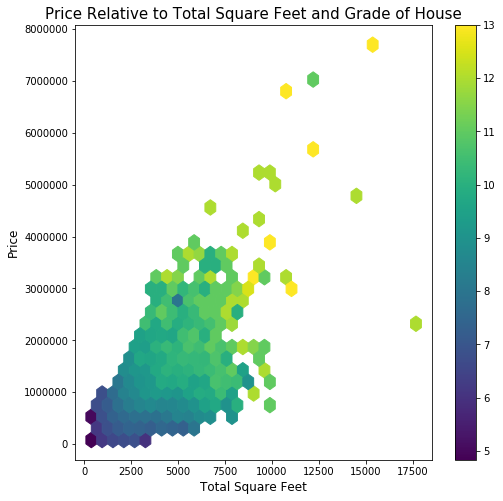

In [51]:
df.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, cmap="viridis", sharex=False, figsize=(8,8))
plt.title('Price Relative to Total Square Feet and Grade of House', fontsize=15)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Total Square Feet', fontsize=12)
plt.show()